***1.Import the labries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

***2.Importing the Data Set***

In [2]:
df=pd.read_csv("C:/Users/Arun Kumar Angu/OneDrive/Desktop/python jupyter/Python_Diwali_Sales_Analysis-main/Diwali Sales Data.csv",encoding='unicode_escape')

In [3]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


***3.Deleting the Unwanted Columns***

In [6]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

***4.Checking for the Null Values***

In [7]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

***5.Droping the Null Values***

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(11239, 13)

***6.Checking the Data Types***

In [10]:
df['Amount'].dtypes

dtype('float64')

***7.Changing the Data type From Float to INT***

In [11]:
df['Amount']=df['Amount'].astype('int')
df['Amount'].dtype

dtype('int64')

***8.Describing the Data Frames its return mean,median,count***

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
df[['Age','Amount','Orders']].describe()

,Age,Amount,Orders
count,11239.000000,11239.000000,11239.000000
mean,35.410357,9453.610553,2.489634
std,12.753866,5222.355168,1.114967
min,12.000000,188.000000,1.000000
25%,27.000000,5443.000000,2.000000
50%,33.000000,8109.000000,2.000000
75%,43.000000,12675.000000,3.000000
max,92.000000,23952.000000,4.000000


**8.Exploratory Data Analysis**

***Gender***

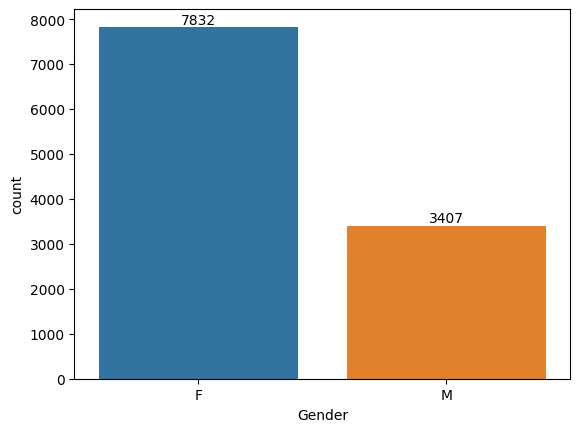

In [14]:
ax=sns.countplot(x='Gender',data=df,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

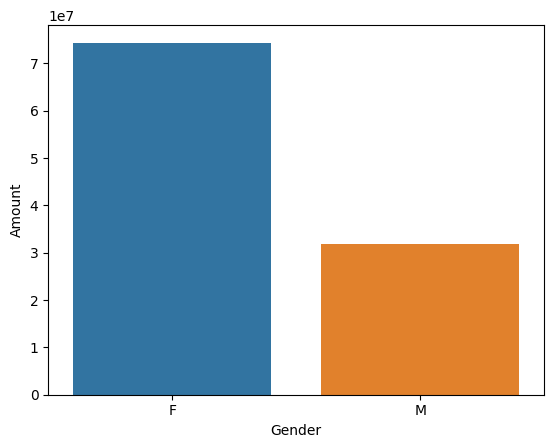

In [15]:
sale=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sale,hue='Gender')

***From the Above graphs we can see that most of the buyers are female and even purchasing power of female is greater then men***

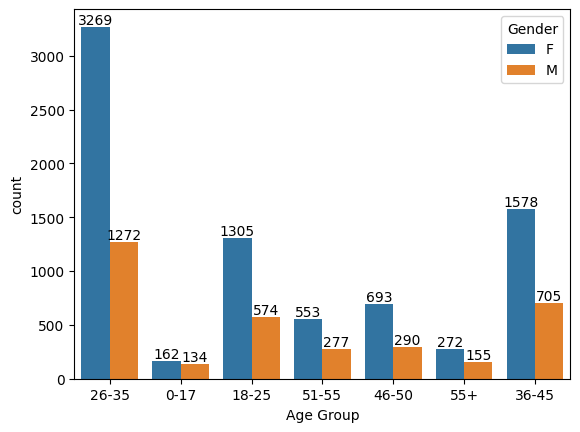

In [16]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

***10.Total Amount vs Age Group***

<Axes: xlabel='Age Group', ylabel='Amount'>

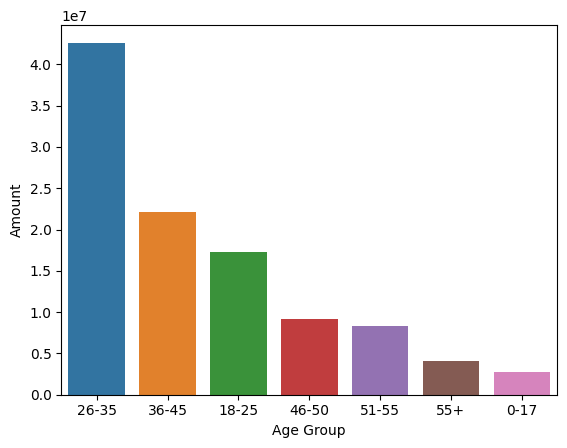

In [17]:
sale=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sale,hue='Age Group')

***From the Above graph we can see that most of the buyers are of age group between 26-35 yrs females***




***Total Numbers of Orders from Top 10 States***

<Axes: xlabel='State', ylabel='Orders'>

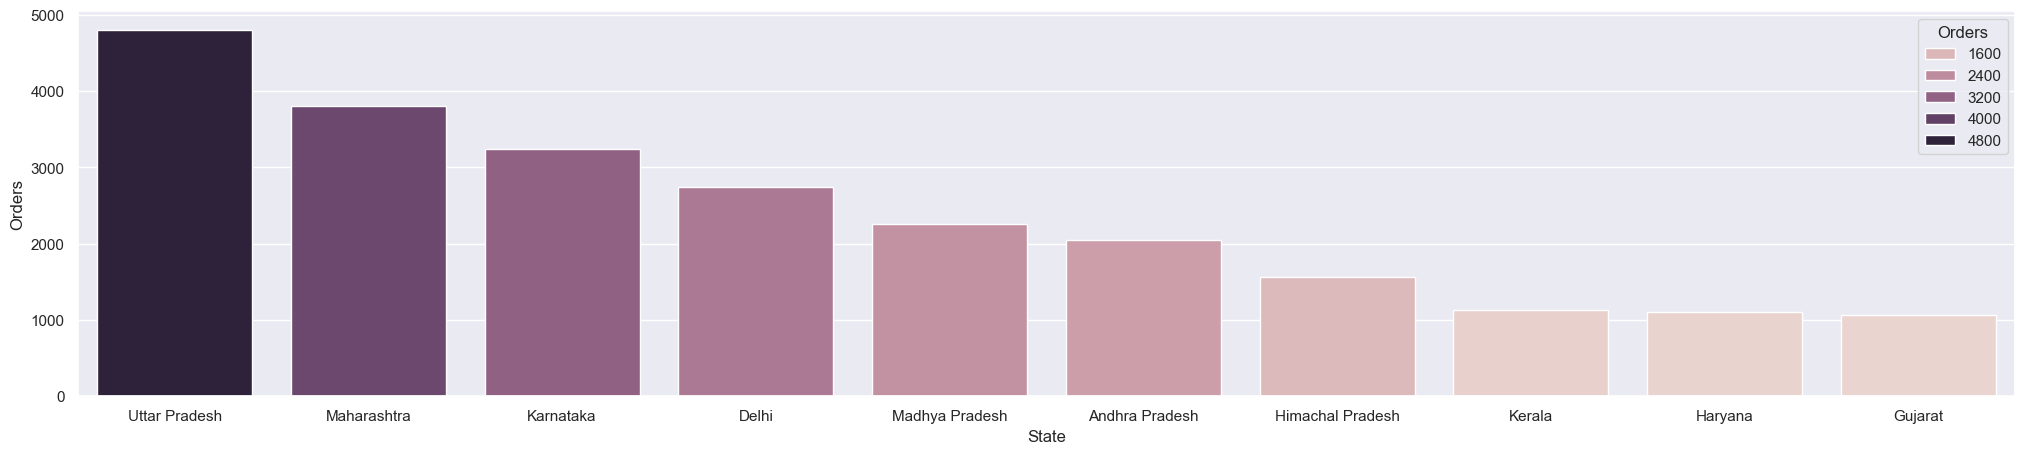

In [18]:
sns.set(rc={'figure.figsize':(25,5)})
sales=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(x='State',y='Orders',data=sales,hue='Orders')

***From the Above Graph we can see that Most of the Orders from Uttar Pradesh,Maharashtra and Karnataka***

<Axes: xlabel='State', ylabel='Amount'>

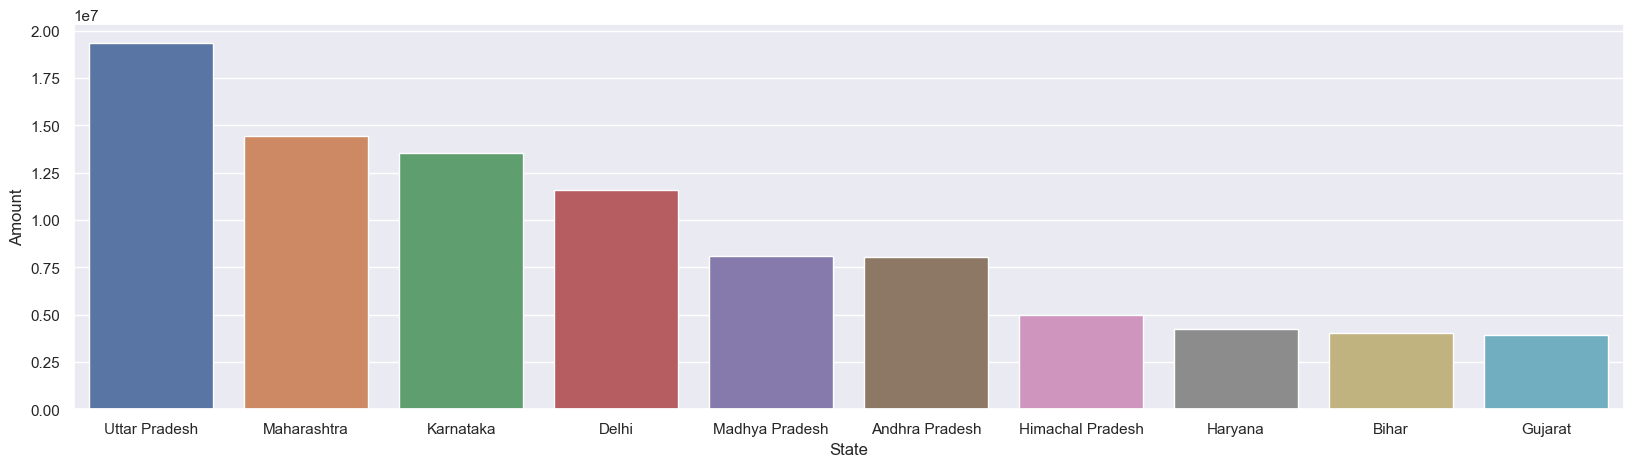

In [19]:
sale=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State',y='Amount',data=sale,hue='State')

***From the Above Graph we can see that most Buyers,Order and sales/Amount From the up,Maharastra and Karnataka***

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

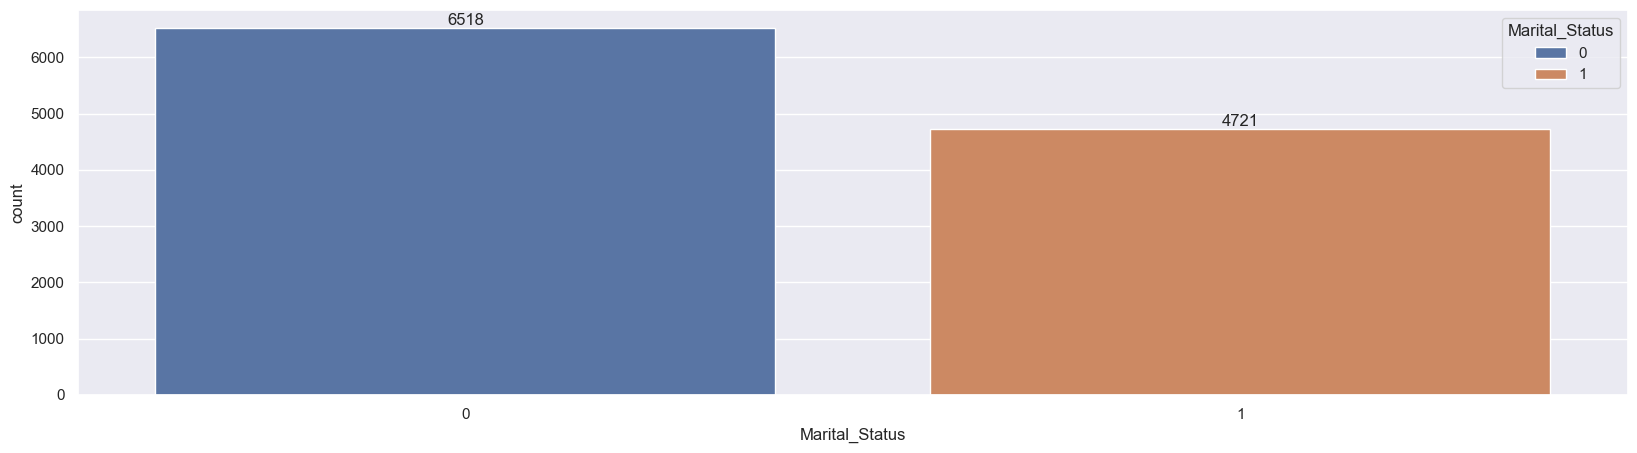

In [21]:
ax=sns.countplot(x='Marital_Status',data=df,hue='Marital_Status')
sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

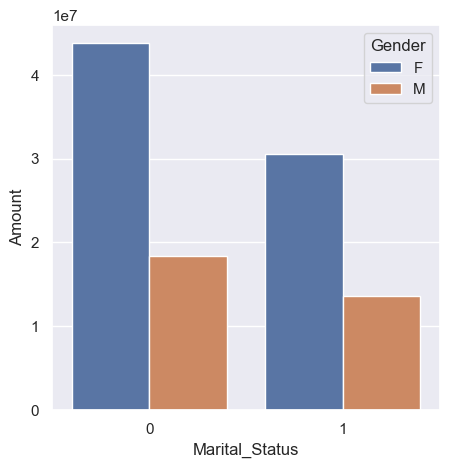

In [22]:
sale=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='Marital_Status',y='Amount',data=sale,hue='Gender')

***From the Above Graph most of the Buyer are Married Women and there purchasing Power is more***

In [25]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Occupation', ylabel='Amount'>

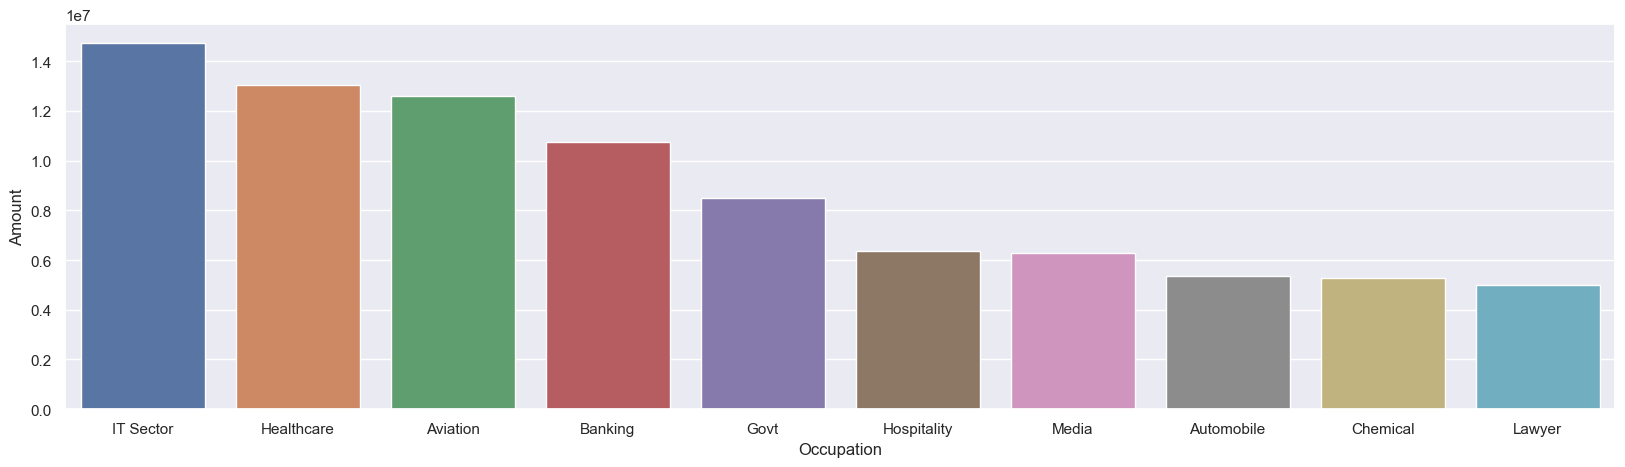

In [28]:
sale=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation',y='Amount',data=sale,hue='Occupation')

***From the Above graph we can see that people who's working in the IT Sector,Healthcare,Aviation are most buyer***

<Axes: xlabel='Product_Category', ylabel='Amount'>

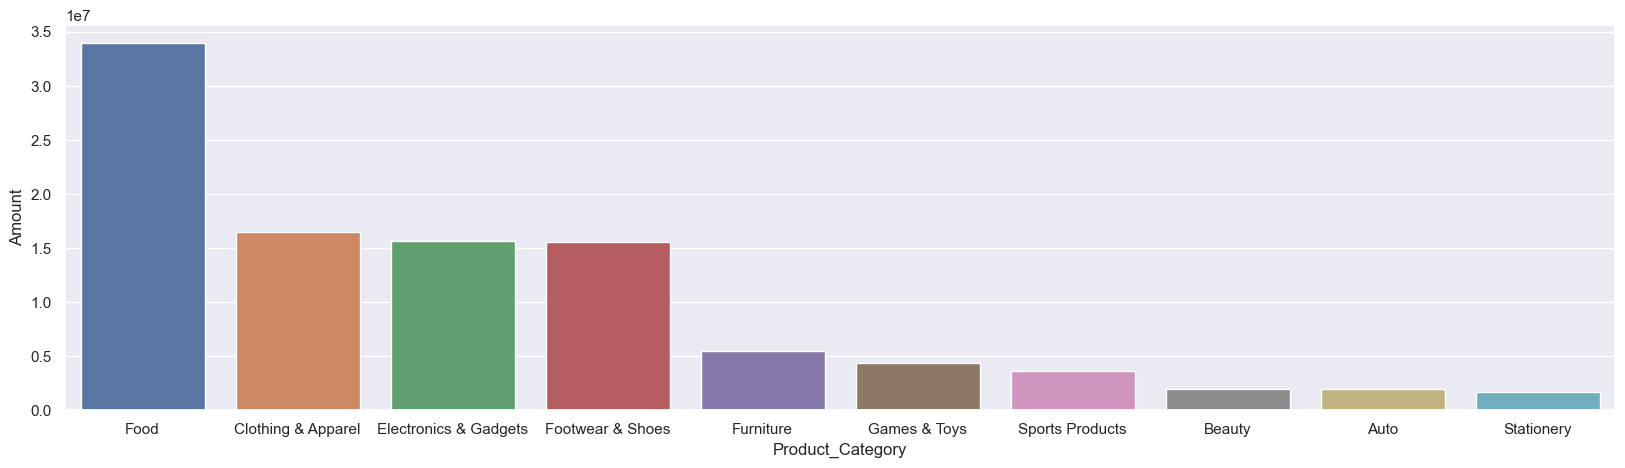

In [29]:
sale=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_Category',y='Amount',data=sale,hue='Product_Category')

From the above Graph we can see that high saleing product are i.e food,Clothing & Apparel,Electronic

**Conclusion:**  
From the above graph we have analysis that:  
***Married Women Age-Group 26–35 from UP, Maharashtra, Karnataka working in IT-Sector, Healthcare and Aviation are more likely to buy a product from Food, Clothing, Electronics***